# Assignment 1

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

In [2]:
#Read the data from csv
insure_data = pd.read_csv('insurance.csv')

In [3]:
df = pd.DataFrame(insure_data)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Performing EDA
np.shape(df)

(1338, 7)

- There are 1338 records and 7 columns in the dataset

In [5]:
#To check the complete info and datatypes of each attribute
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# Checking the presence of missing values column wise for 3 columns
bool_tab = pd.isnull(df['age']) | pd.isnull(df['sex']) | pd.isnull(df['bmi'])
df[bool_tab]

,age,sex,bmi,children,smoker,region,charges


In [8]:
# Checking the presence of missing values in whole dataframe
df.isnull().values.any()

False

In [9]:
df.isna().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


- As we can see there are no missing values in the whole dataset.

In [10]:
#5 point summary
df.describe()[['age','bmi','charges','children']]

,age,bmi,charges,children
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265,1.094918
std,14.049960,6.098187,12110.011237,1.205493
min,18.000000,15.960000,1121.873900,0.000000
25%,27.000000,26.296250,4740.287150,0.000000
50%,39.000000,30.400000,9382.033000,1.000000
75%,51.000000,34.693750,16639.912515,2.000000
max,64.000000,53.130000,63770.428010,5.000000


- From the 5 point summary we can understand the mean and standard deviation of listed attributes. Quartiles are also visible which helps us to understand the data more.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A35F0DA1C8>,
      dtype=object)

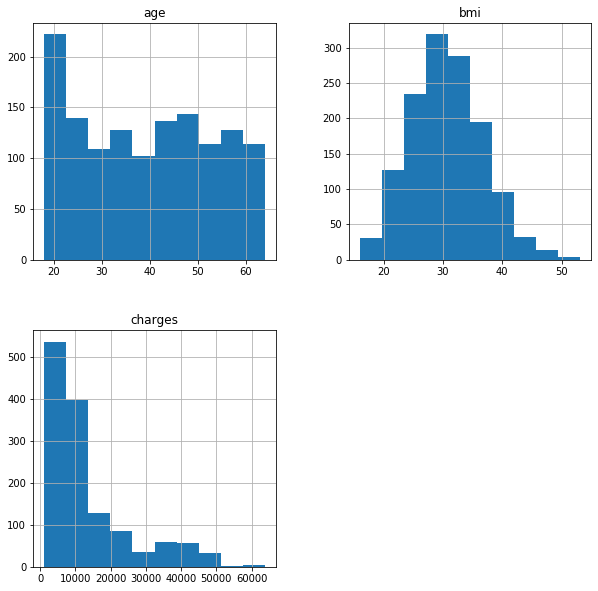

In [11]:
#Distribution
df.hist(column=['age','bmi','charges'],figsize=(10,10))

- We can notice that there are more young aged people in the dataset and the rest is equally distributed.
- The bmi follows normal distribution.
- Charges is right skewed data.

In [12]:
#Measure of skewness
df[['age','bmi','charges']].skew()

age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64

- Like we can see Charges has high skewness and the rest are not skewed

# Checking for outliers

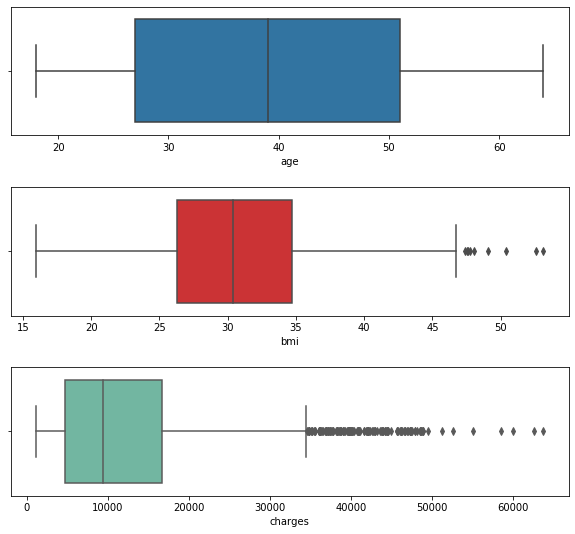

In [13]:
plt.figure(figsize= (10,9))
plt.subplot(3,1,1)
sns.boxplot(df["age"])
plt.subplot(3,1,2)
sns.boxplot(df["bmi"], orient="h", palette="Set1")
plt.subplot(3,1,3)
sns.boxplot(df["charges"], orient="h", palette="Set2")
plt.subplots_adjust(hspace=0.4)
plt.show()

- Age does not contain outliers. 
- We notice some outliers for Bmi.
- Charges attribute has many outlies. 

# Distribution of Categorical columns

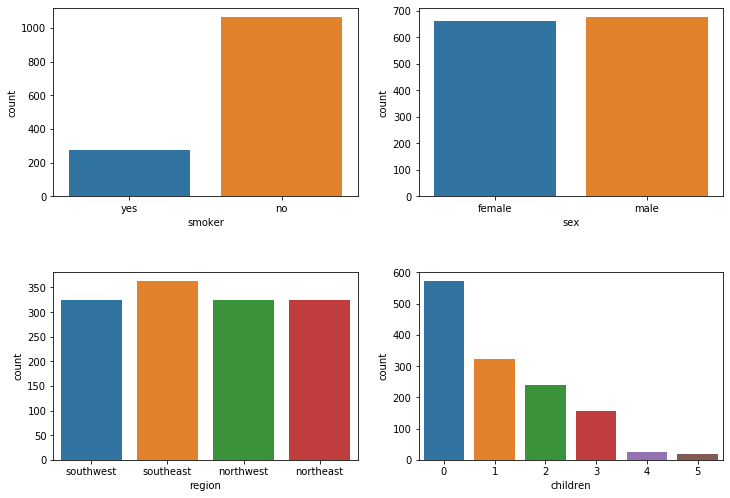

In [14]:
plt.figure(figsize=(12,18))
plt.subplot(4,2,1)
sns.countplot(x="smoker", data=df)
plt.subplot(4,2,2)
sns.countplot(x="sex", data=df)
plt.subplot(4,2,3)
sns.countplot(x="region", data=df)
plt.subplot(4,2,4)
sns.countplot(x="children", data=df)
plt.subplots_adjust(hspace=0.4)
plt.show()

- We can notice that there are less number of smokers as compared to non-smokers.
- There are almost equal number of male and female in dataset and the the records are equally distributed among the regions.
- Number of records are more for lower count of children.

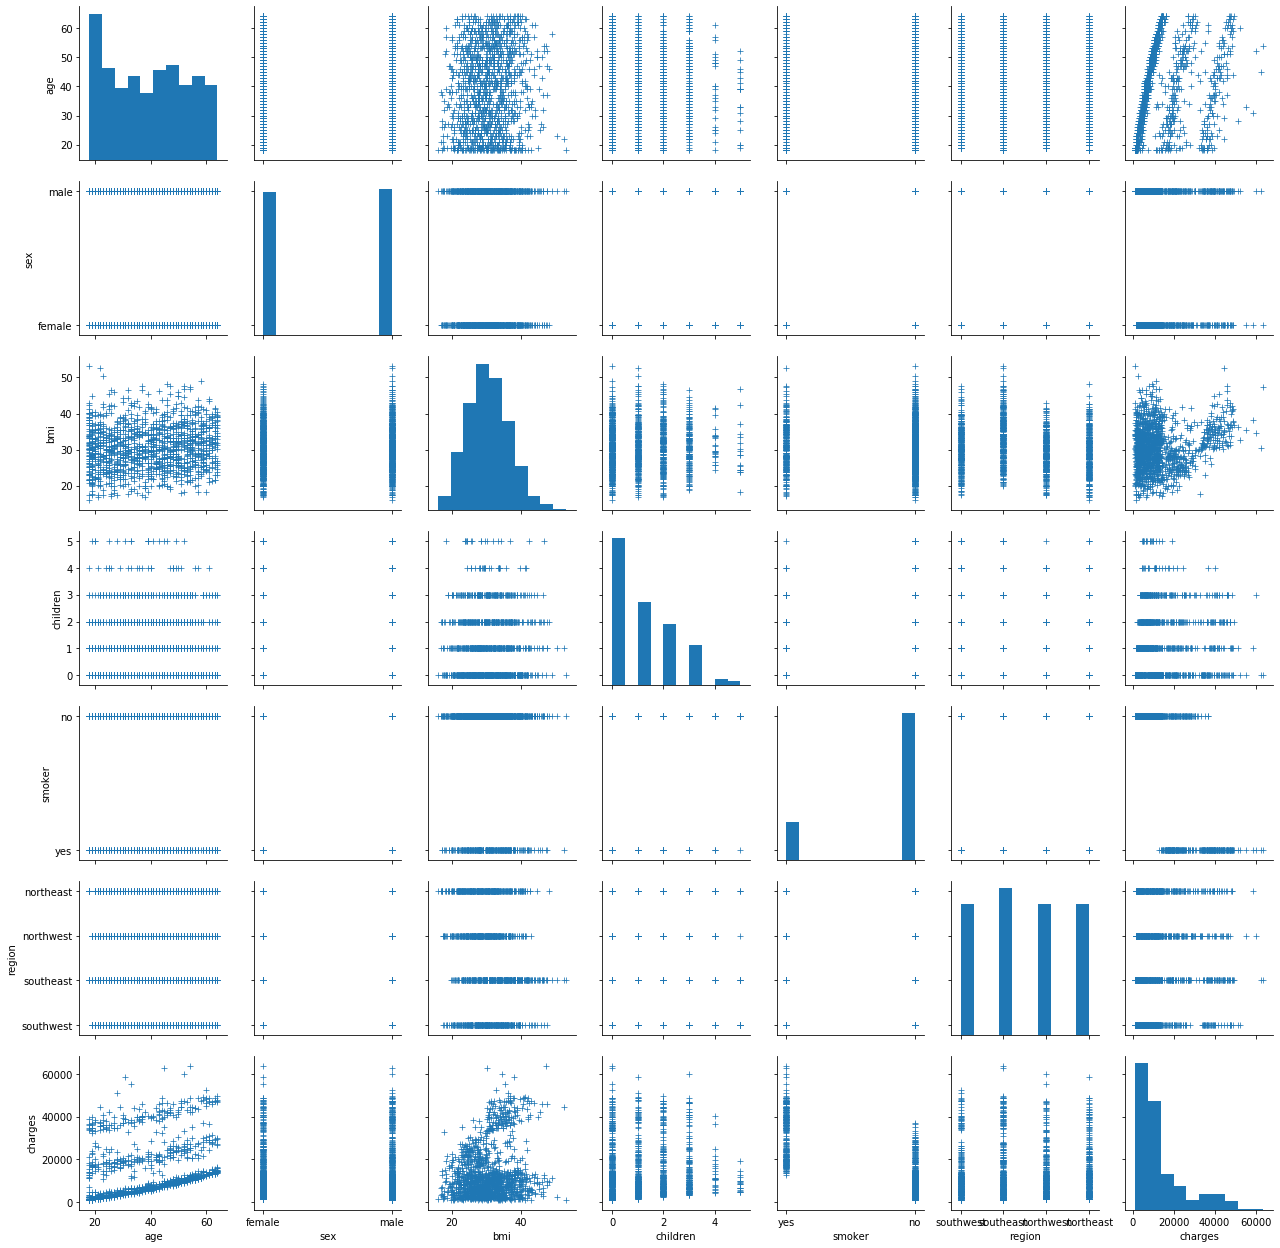

In [15]:
sns.pairplot(df,vars=['age'
,'sex'
,'bmi'
,'children'
,'smoker'
,'region'
,'charges'], markers="+")

- By looking at the pair plot we can say if there is any correalation between the variables. 
- We can say that there may be relation between age and charges. 
- There is no relation of sex, bmi and region with any other variable.
- By looking at the plot between smoker and charges, we can say that there is higher charges for smokers and lower charges insured for non-smoker.

# Questions of Hypothesis with statistical evidence. 

Number of smokers are: 274
Number of non-smokers are: 1064
46.664921172723716 8.271435842177219e-283
Charges of smoker and non-smoker differ significantly since p value: 8.271435842177219e-283 < 0.05


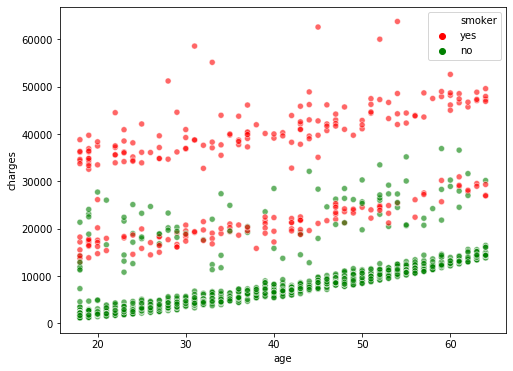

In [16]:
#Do charges of people who smoke differ significantly from the people who don't? 
#T-test

# Null Hypothesis
Ho = "Charges of smoker and non-smoker are same"
# Alternate Hypothesis
Ha = "Charges of smoker and non-smoker differ significantly"

group1 = df[df.smoker=='yes'].charges
group2 = df[df.smoker=='no'].charges

#Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue= df.smoker,palette= ['red','green'] ,alpha=0.6)

print("Number of smokers are:", group1.count())
print("Number of non-smokers are:", group2.count())

t_statistic, p_value = ttest_ind(group1, group2)
print(t_statistic, p_value)

if p_value < 0.05: #significance value 5%
    print(f'{Ha} since p value: {p_value} < 0.05')
else:
    print(f'{Ho} since p value: {p_value} > 0.05')

Number of male in dataset are: 676
Number of female in dataset are: 662
1.696752635752224 0.08997637178984932
BMI does not depend on gender since p value: 0.08997637178984932 > 0.05


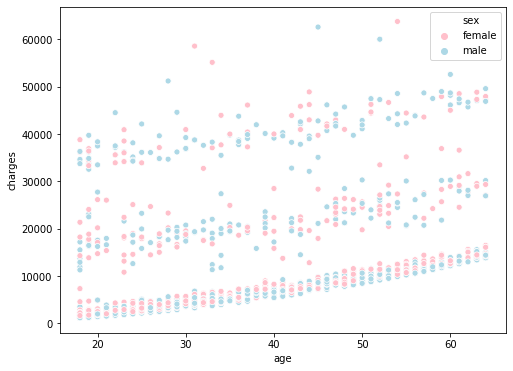

In [20]:
#Does bmi of males differ significantly from that of females? 
#T-test

# Null Hypothesis
Ho_2 = "BMI does not depend on gender"
# Alternate Hypothesis
Ha_2 = "BMI of male differ significantly from that of female"

group3 = df[df.sex=='male'].bmi
group4 = df[df.sex=='female'].bmi

plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.sex,palette= ['pink','lightblue'] )

print("Number of male in dataset are:", group3.count())
print("Number of female in dataset are:", group4.count())

t_statistic, p_value = ttest_ind(group3, group4)
print(t_statistic, p_value)

if p_value < 0.05: #significance value 5%
    print(f'{Ha_2} since p value: {p_value} < 0.05')
else:
    print(f'{Ho_2} since p value: {p_value} > 0.05')

In [18]:
#Is the proportion of smokers significantly different in different genders?
#Test of proportion

# Null Hypothesis
Ho_3 = "Gender doesn't affect smoking"
# Alternate Hypothesis
Ha_3 = "Gender has significant affect on smoking"

female_smoker = df[df.sex == 'female'].smoker.value_counts()[1]
male_smoker = df[df.sex == 'male'].smoker.value_counts()[1]
n_females =df.sex.value_counts()[1]
n_males = df.sex.value_counts()[0]

crosstab = pd.crosstab(df['sex'],df['smoker'])  # Contingency table of sex and smoker attributes

stat, p_value = proportions_ztest([female_smoker, male_smoker], [n_females, n_males])

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value {p_value} < 0.05')
else:
    print(f'{Ho} as the p_value {p_value} > 0.05')


Charges of smoker and non-smoker differ significantly as the p_value 0.005324114164320532 < 0.05


In [19]:
#Is the distribution of bmi across women with no children, one child and two children, the same? 

#Null Hypothesis
Ho_4 = "Number of children has no affect of BMI of female"

#Alternate Hypothesis
Ha_4 = "Number of children has significant affect on BMI of female"

df_only_female = df[df.sex =='female'].copy()

no_child = df_only_female[df_only_female.children == 0].bmi
one_child = df_only_female[df_only_female.children == 1].bmi
two_child = df_only_female[df_only_female.children == 2].bmi

f_stat, p_value = stats.f_oneway(no_child,one_child,two_child)

#significance at 95%
if p_value < 0.05:
    print(f'{Ha_4} since {p_value} is less than 0.05')
else:
    print(f'{Ho_4} since {p_value} is more than 0.05')

Number of children has no affect of BMI of female since 0.7158579926754841 is more than 0.05
